In [2]:
%run setup.py
import tqdm

/home/daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
koi = pd.read_csv('../data/koi_dsct.csv')
toi = pd.read_csv('../data/toi.csv')

In [7]:
toi[toi['dsct'] == True]['TIC ID'].values

array([193413306, 309402106,  19451711, 129979528, 156987351, 202563254,
       255704097, 295599256,  89759617,  80275202, 409934330, 120269103,
       372913430])

In [3]:
from astropy.stats import BoxLeastSquares

def high_pass(t, y, width=3.):
    y_low = gaussian_filter(y, width)
    return y - y_low

def get_kepler_lc(kic_id):
    file = glob.glob(f'../data/lightcurves/Kepler/*{kic_id}.txt')[0]
    t, y = np.loadtxt(file, usecols=(0,1)).T
    return t, y
    
def preprocess_lc(t, y):
    y = high_pass(t, y)
    lc = lk.LightCurve(t, y).remove_outliers()
    return lc.time, lc.flux

## Kepler objects of interest

circumbinary ?? jack lissauer

In [5]:
# koi_dsct = koi[koi['dsct'] == True].sort_values('koi_period', ascending=False)
koi_dsct = koi
koi_dsct.sort_values('koi_period')

,Unnamed: 0,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,dsct
16,16,11180361,K00971.01,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,1.000,0,...,1.60,8.40,2.00,9.700,2.200,-7.200,2.400,12.100,3.000,True
11,11,5617259,K07733.01,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.139,0,...,0.09,0.34,0.10,0.095,0.091,-0.065,0.089,0.115,0.099,True
9,9,11013201,K00972.02,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.000,0,...,1.70,3.90,1.70,-4.700,1.200,3.000,1.800,5.600,1.700,True
8,8,11013201,K00972.03,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.632,0,...,1.30,5.20,1.50,-3.210,0.810,4.300,1.100,5.400,1.300,True
4,4,5202905,K01932.02,Kepler-340 b,CONFIRMED,Done,16/8/18,CANDIDATE,0.636,0,...,0.26,0.39,0.39,0.400,0.440,-0.150,0.250,0.430,0.400,True
0,0,3964109,K00393.01,Kepler-544 b,CONFIRMED,Done,16/8/18,CANDIDATE,1.000,0,...,0.48,0.63,0.57,0.000,1.300,0.500,0.510,0.500,0.530,True
3,3,5202905,K01932.01,Kepler-340 c,CONFIRMED,Done,16/8/18,CANDIDATE,0.944,0,...,0.22,0.32,0.23,-0.110,0.260,0.430,0.230,0.440,0.220,True
14,14,9289704,K02222.01,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.987,0,...,0.13,0.36,0.17,-0.460,0.170,0.010,0.130,0.460,0.170,True
15,15,3965201,K07546.01,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,NaN,0,...,0.60,0.54,0.79,-0.290,0.580,0.560,0.540,0.630,0.690,True
2,2,9845898,K02423.01,Kepler-1233 b,CONFIRMED,Done,16/8/18,CANDIDATE,1.000,0,...,1.10,0.60,0.85,0.110,0.700,-0.700,1.100,0.700,1.100,True


In [6]:
ii = 1
koi_dsct.iloc[ii].kepid

9111849

In [13]:
t, y =get_kepler_lc(koi_dsct.iloc[ii].kepid)
t, y = preprocess_lc(t, y)

koi_period = koi_dsct.iloc[ii].koi_period
koi_period_err = koi_dsct.iloc[ii].koi_period_err1
koi_eccen = koi_dsct.iloc[ii].koi_eccen

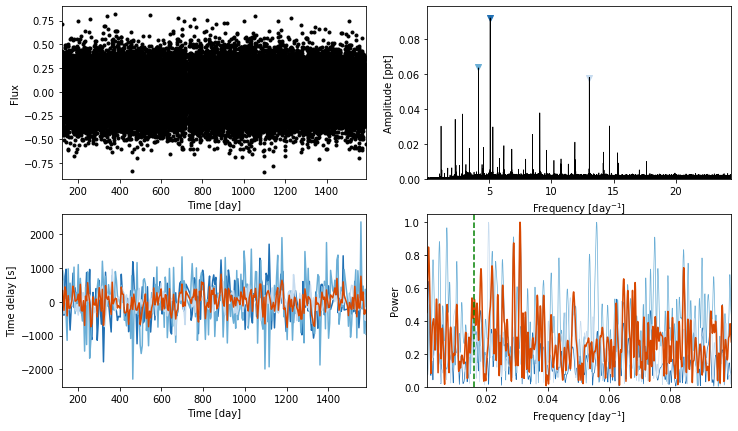

In [16]:
ms = Maelstrom(t, y, max_peaks=3, fmin=3, fmax=41)
ax = ms.first_look(segment_size=5);
ax[3].axvline(1./koi_period, c='g', linestyle='dashed')

In [12]:
ms.get_period_estimate()

24.99779214243913

In [14]:
koi_period

96.509214

In [48]:
# ms.setup_orbit_model()
opt = ms.optimize()

INFO (theano.gof.compilelock): Refreshing lock /Users/daniel/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


In [50]:
opt

{'logperiod': array(3.58570974),
 't0': array(6.96358421),
 'varpi_angle__': array([-3.92326842, -2.14657833]),
 'eccen_interval__': array(-0.23625339),
 'logs': array(-0.52333397),
 'lighttime': array([14.80934077]),
 'mean_flux': array(-0.00072915),
 'W_hat_cos': array([1.93076119]),
 'W_hat_sin': array([-0.27748992]),
 'period': array(36.07895531),
 'varpi': array(-2.07144135),
 'eccen': array(0.44121102),
 'tref': array(18.74797576)}

In [51]:
koi_period

111.65546

(0, 0.5)

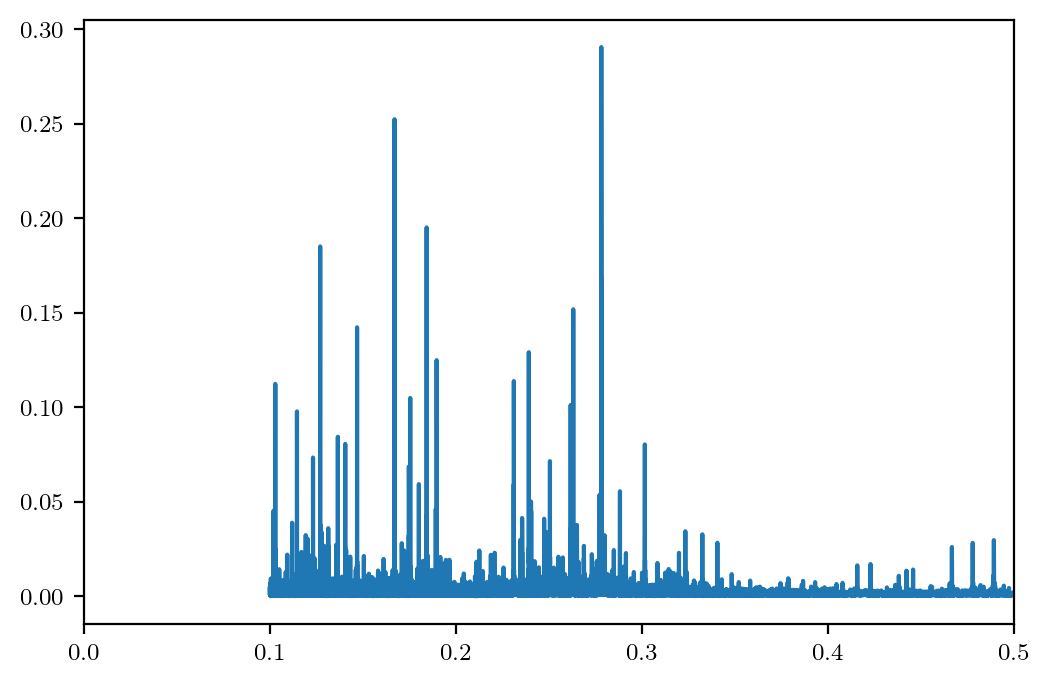

In [40]:
from maelstrom.utils import amplitude_spectrum
f,a = amplitude_spectrum(ms.time, ms.flux, fmax=10)
plt.plot(1/f,a)
plt.xlim(0,0.5)

In [12]:
koi_period

96.509214

In [13]:
ms.get_period_estimate()

25.003775388532787

In [14]:
25.003775388532787*4

100.01510155413115

In [45]:
pg = ms.period_search()

In [16]:
periods = np.linspace(20, 120, 200)

In [17]:
res = pg.fit(periods)

100%|██████████| 200/200 [12:04<00:00,  3.62s/it]  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c95d910>,
      dtype=object)

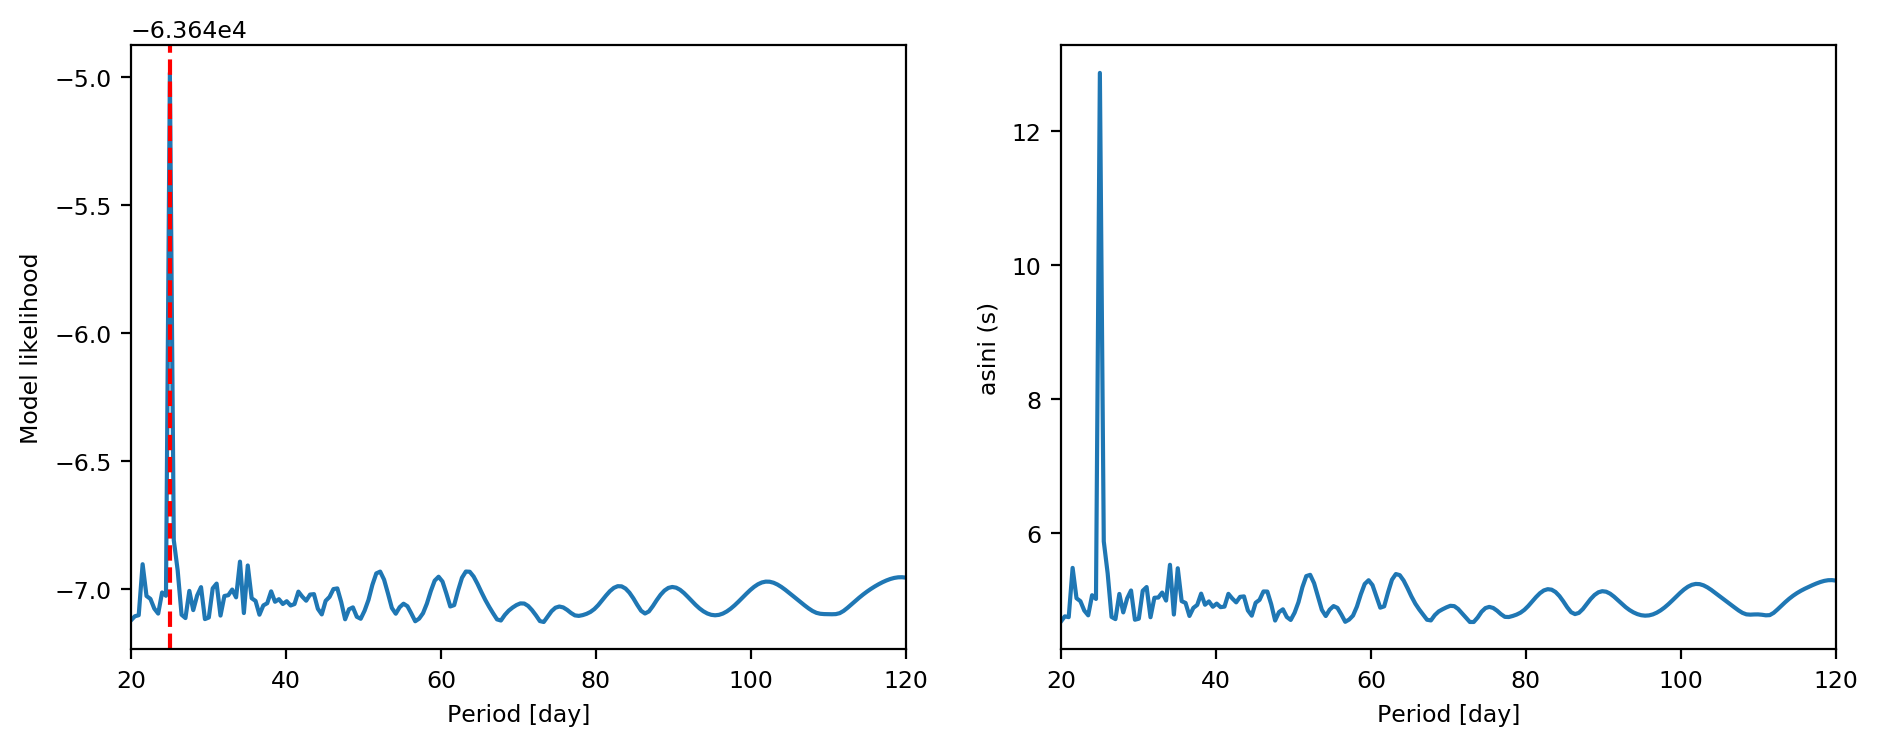

In [18]:
pg.diagnose()

In [46]:
res = pg.fit(np.array([koi_period]))

100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


In [47]:
res

[[(-50600.48467512915,
   {'period': array(14.8444836),
    'nu': array(38.39793548),
    'phi_angle__': array([ 3.7456521 , -2.44337488]),
    'logasini_interval__': array(-1.07991159),
    'drift': array(1.18670804e-08),
    'phi': array(2.14880283),
    'logasini': array(1.75127309),
    'w': array([-4.08812247e-01, -1.64595142e-01, -1.47634083e-04]),
    'phase': array(-2.75883148)})],
 [(-52482.735225454184,
   {'period': array(14.8444836),
    'nu': array(36.3720579),
    'phi_angle__': array([ 2.55542318, -3.67012431]),
    'logasini_interval__': array(-0.7703398),
    'drift': array(-3.64048061e-08),
    'phi': array(2.53336971),
    'logasini': array(2.18565249),
    'w': array([-1.68553805e-01, -1.48094545e-01,  7.79412757e-05]),
    'phase': array(-2.42071673)})],
 [(-52613.75187717136,
   {'period': array(14.8444836),
    'nu': array(32.76607507),
    'phi_angle__': array([ 0.22061163, -4.46669164]),
    'logasini_interval__': array(-0.71277995),
    'drift': array(5.975051

In [48]:
np.exp(1.75127309)

5.761933468515725

In [49]:
koi_period

14.8444836

In [11]:
time, flux = ms.time, ms.flux
freq, weight = ms.freq, ms.get_weights(norm=False)

In [85]:
from exoplanet.orbits import get_true_anomaly
import exoplanet as xo
import astropy.units as u
import theano.tensor as tt

with pm.Model() as model:
#     logP = pm.Normal("logP", mu=np.log(koi_period), sd=0.1,
#                                       testval=np.log(koi_period))
    period = koi_period#pm.Deterministic("period", pm.math.exp(logP))
    
    # The time of conjunction
    phi = xo.distributions.Angle("phi")
    logs_lc = pm.Normal('logs_lc', mu=np.log(np.std(flux)), sd=10, testval=np.log(np.std(flux)))
    
    asini = pm.Uniform('asini', lower=0,
                        upper=100, testval=1e-5, shape=len(freq))

    # The baseline flux
    mean = pm.Normal("mean", mu=0.0, sd=10.0, testval=0.003)   

    # Mean anom
    M = 2.0 * np.pi * time / period - phi
    
    if koi_eccen == 0:
        omega = 0.
        # Eccentricity
        eccen = 0.
        psi = -tt.sin(M)
    else:
        omega = xo.distributions.Angle("omega")
        eccen = pm.Uniform("eccen", lower=0, upper=0.9, testval=0.5)
        # True anom
        kepler_op = xo.theano_ops.kepler.KeplerOp()
        sinf, cosf = kepler_op(M, eccen + np.zeros(len(time)))

        factor = 1.0 - tt.square(eccen)
        factor /= 1.0 + eccen * cosf
        psi = factor * (sinf*tt.cos(omega)+cosf*tt.sin(omega))
    
    lognu = pm.Normal("lognu", mu=np.log(freq), sd=0.1, shape=len(freq))
    nu = pm.Deterministic("nu", tt.exp(lognu))
    factor = 2. * np.pi * nu
    
    arg = ((factor)[None, :] * time[:, None]
           - (factor * asini / 86400)[None, :] * psi[:, None])

    phase = xo.distributions.Angle("phase", shape=len(freq))
    log_mean_amp = np.log(weight)
    logamp = pm.Normal("logamp", mu=log_mean_amp, sd=1.0, shape=len(freq),
                                         testval=log_mean_amp)
    lc_model = tt.sum(tt.exp(logamp)[None, :] * tt.sin(arg - phase[None, :]), axis=1)
    
    full_lc = lc_model + mean
    pm.Normal("obs", mu=full_lc, sd=tt.exp(logs_lc), observed=flux)

In [86]:
with model:
    all_but = [v for v in model.vars if v.name not in ["logP_interval__", "asini_interval__"]]
    
    map_params = xo.optimize(start=None, vars=[model['mean']])
    map_params = xo.optimize(start=map_params, vars=[model['logs_lc']])
#     map_params = xo.optimize(start=None, vars=[model['logP']])
    map_params = xo.optimize(start=map_params, vars=[model['phase'], model['logamp']])
    if not koi_eccen == 0:
        map_params = xo.optimize(start=map_params, vars=[model['eccen'], model['omega']])
    map_params = xo.optimize(start=map_params, vars=[model["phi"]])
    map_params = xo.optimize(start=map_params, vars=[model["lognu"]])
    map_params = xo.optimize(start=map_params)
    
    map_params = xo.optimize(start=map_params, vars=[model['asini']])
    map_params = xo.optimize(start=map_params)

optimizing logp for variables: [mean]
5it [00:00, 73.67it/s, logp=-1.738579e+04]
message: Optimization terminated successfully.
logp: -17393.347869263416 -> -17385.788026296937
optimizing logp for variables: [logs_lc]
9it [00:00, 85.66it/s, logp=-8.680156e+03]
message: Optimization terminated successfully.
logp: -17385.788026296937 -> -8680.155673709249
optimizing logp for variables: [logamp, phase]
141it [00:02, 67.72it/s, logp=1.538600e+04]
message: Desired error not necessarily achieved due to precision loss.
logp: -8680.155673709249 -> 15386.000898592583
optimizing logp for variables: [phi]
10it [00:00, 56.33it/s, logp=1.540646e+04]
message: Optimization terminated successfully.
logp: 15386.000898592583 -> 15406.45822132807
optimizing logp for variables: [lognu]
60it [00:00, 64.87it/s, logp=1.540646e+04]
message: Desired error not necessarily achieved due to precision loss.
logp: 15406.45822132807 -> 15406.458221960445
optimizing logp for variables: [logamp, phase, lognu, mean, asi

In [87]:
map_params

{'phi_angle__': array([-2.97725824,  3.33705726]),
 'logs_lc': array(-1.95209218),
 'asini_interval__': array([-2.62548996, -1.36875501, -0.85685427]),
 'mean': array(-3.18518491e-05),
 'lognu': array([3.2547451 , 1.98386232, 1.76046998]),
 'phase_angle__': array([[-4.09278275,  0.67805545, -4.4673574 ],
        [-1.80253006, -4.42043582, -0.20686668]]),
 'logamp': array([-1.68793424, -2.89440753, -3.11653554]),
 'phi': array(-0.72847824),
 'asini': array([ 6.75158378, 20.28210673, 29.79969969]),
 'nu': array([25.91300841,  7.27077088,  5.81516974]),
 'phase': array([-1.9856523 ,  2.9893879 , -1.61706955])}

In [ ]:
np.random.seed(42)
with model:
    trace = pm.sample(
        tune=1000,
        draws=1000,
        step=xo.get_dense_nuts_step(target_accept=0.9),
        start=map_params
    )

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [logamp, phase, lognu, mean, asini, logs_lc, phi]
Sampling 4 chains:  11%|█         | 845/8000 [25:34<8:04:14,  4.06s/draws] 

In [ ]:
import pickle # python3

with open(f'results/{koi_dsct.iloc[ii].kepid}.pkl', 'wb') as buff:
    pickle.dump({'model': model, 'trace': trace}, buff)

In [ ]:
# import pickle

# with open(f'results/{koi_dsct.iloc[ii].kepid}.pkl', 'rb') as buff:
#     data = pickle.load(buff)  

# basic_model, trace = data['model'], data['trace']

In [ ]:
pm.summary(trace)

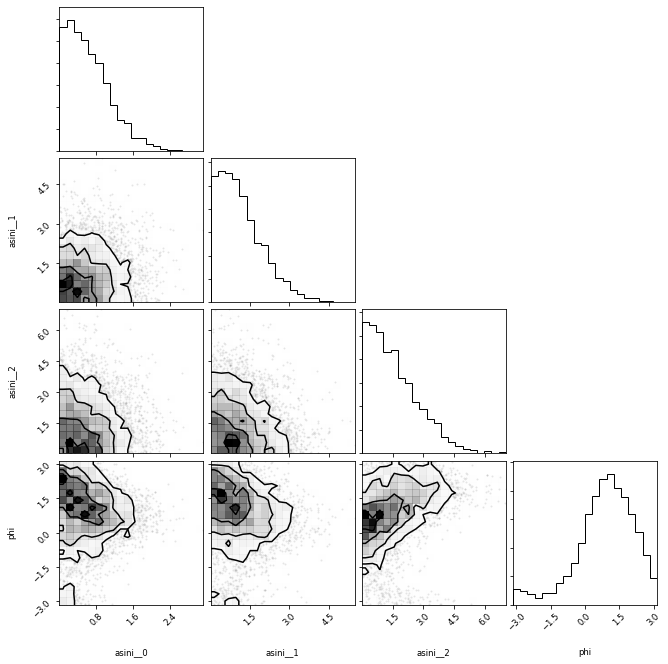

In [44]:
import corner

corner.corner(pm.trace_to_dataframe(trace, varnames=['asini', 'phi']));

# TESS objects of interest

In [1]:
toi_dsct = toi[toi['dsct'] == True].sort_values('Period (days)', ascending=False)
toi_dsct[['TIC ID', 'Period (days)']]

NameError: name 'toi' is not defined

In [27]:
import lightkurve as lk

lc = lk.TessLightCurveFile('../data/lightcurves/TESS/309402106.fits').FLUX.remove_nans()
t, y = lc.time, lc.flux

In [28]:
# t, y = preprocess_lc(t, y)

koi_period = 216.244995
koi_period_err = 0.01
koi_eccen = 0.

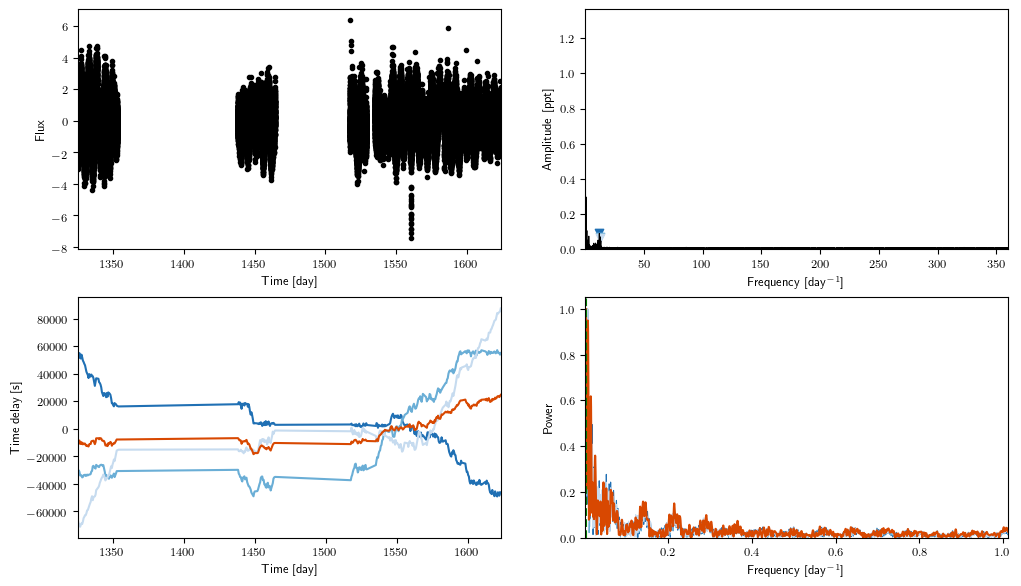

In [29]:
ms = Maelstrom(t, y, max_peaks=3, fmin=5, fmax=41)
ax = ms.first_look();
ax[3].axvline(1./koi_period, c='g', linestyle='dashed')

In [30]:
time, flux = ms.time, ms.flux
freq, weight = ms.freq, ms.get_weights(norm=False)

In [33]:
from exoplanet.orbits import get_true_anomaly
import exoplanet as xo
import astropy.units as u
import theano.tensor as tt

with pm.Model() as model:
#     logP = pm.Normal("logP", mu=np.log(koi_period), sd=0.1,
#                                       testval=np.log(koi_period))
    period = koi_period#pm.Deterministic("period", pm.math.exp(logP))
    
    # The time of conjunction
    phi = xo.distributions.Angle("phi")
    logs_lc = pm.Normal('logs_lc', mu=np.log(np.std(flux)), sd=10, testval=np.log(np.std(flux)))
    
    asini = pm.Uniform('asini', lower=0,
                        upper=100, testval=1e-5, shape=len(freq))

    # The baseline flux
    mean = pm.Normal("mean", mu=0.0, sd=10.0, testval=0.003)   

    # Mean anom
    M = 2.0 * np.pi * time / period - phi
    
    if koi_eccen == 0:
        # Periastron sampled from uniform angle
        omega = 0.#xo.distributions.Angle("omega")
        # Eccentricity
        eccen = 0.#pm.Uniform("eccen", lower=0, upper=0.9, testval=0.5)
        psi = -tt.sin(M)
    else:
        omega = xo.distributions.Angle("omega")
        eccen = pm.Uniform("eccen", lower=0, upper=0.9, testval=0.5)
        # True anom
        kepler_op = xo.theano_ops.kepler.KeplerOp()
        sinf, cosf = kepler_op(M, eccen + np.zeros(len(time)))

        factor = 1.0 - tt.square(eccen)
        factor /= 1.0 + eccen * cosf
        psi = factor * (sinf*tt.cos(omega)+cosf*tt.sin(omega))
    
    lognu = pm.Normal("lognu", mu=np.log(freq), sd=0.1, shape=len(freq))
    nu = pm.Deterministic("nu", tt.exp(lognu))
    factor = 2. * np.pi * nu
    
    arg = ((factor)[None, :] * time[:, None]
           - (factor * asini / 86400)[None, :] * psi[:, None])

    phase = xo.distributions.Angle("phase", shape=len(freq))
    log_mean_amp = np.log(weight)
    logamp = pm.Normal("logamp", mu=log_mean_amp, sd=1.0, shape=len(freq),
                                         testval=log_mean_amp)
    lc_model = tt.sum(tt.exp(logamp)[None, :] * tt.sin(arg - phase[None, :]), axis=1)
    
    full_lc = lc_model + mean
    pm.Normal("obs", mu=full_lc, sd=tt.exp(logs_lc), observed=flux)

INFO (theano.gof.compilelock): Refreshing lock /Users/daniel/.theano/compiledir_Darwin-19.4.0-x86_64-i386-64bit-i386-3.7.6-64/lock_dir/lock


TypeError: unsupported operand type(s) for *: 'TensorVariable' and 'float'

In [32]:
time

array([1325.29522136, 1325.29661021, 1325.29799907, ..., 1623.8896389 ,
       1623.89102776, 1623.89241662])

In [ ]:
with model:
    all_but = [v for v in model.vars if v.name not in ["logP_interval__", "asini_interval__"]]
    
    map_params = xo.optimize(start=None, vars=[model['mean']])
    map_params = xo.optimize(start=map_params, vars=[model['logs_lc']])
#     map_params = xo.optimize(start=None, vars=[model['logP']])
    map_params = xo.optimize(start=map_params, vars=[model['phase'], model['logamp']])
    if not koi_eccen == 0:
        map_params = xo.optimize(start=map_params, vars=[model['eccen'], model['omega']])
    map_params = xo.optimize(start=map_params, vars=[model["phi"]])
    map_params = xo.optimize(start=map_params, vars=[model["lognu"]])
    map_params = xo.optimize(start=map_params)
    
    map_params = xo.optimize(start=map_params, vars=[model['asini']])
    map_params = xo.optimize(start=map_params)

In [83]:
from maelstrom.utils import mass_function

In [87]:
mass_function(97.434*u.day, 1.789 * u.s)

<Quantity 6.47578891e-07 solMass>

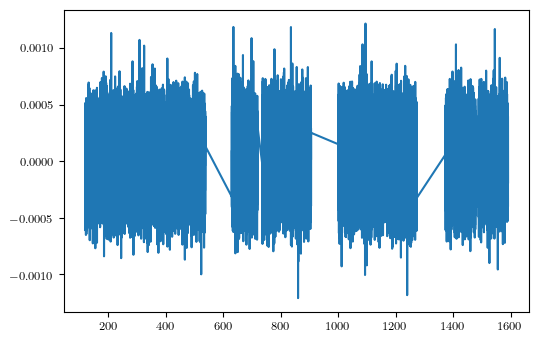

In [33]:
plt.plot(time, flux)

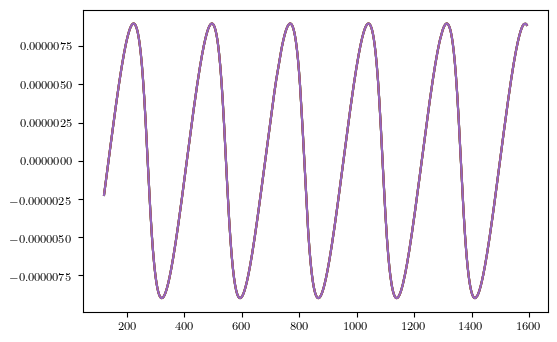

In [114]:
plt.plot(t, test.T)